In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from lib.imports import *
from lib.functions import *
from lib.utils import *
from lib.modules import *
from ipynb.fs.defs.losses import *

In [4]:
cuda_idx = 0
model_params = {
    "num_blocks": 9
}

In [5]:
device = f'cuda:{cuda_idx}' if cuda_idx is not None and torch.cuda.is_available() else 'cpu'

In [6]:
G_list, data_list = load_processed_data(G_list_file='G_list_1.pickle', 
                                        data_list_file='data_list_1.pickle',
                                        index_file='data_index_1.txt')

In [7]:
def load_ckpt(model, name, epoch):
    state_dict = torch.load(f"./checkpoints/{name}/epoch_{epoch}.pt", map_location=torch.device(device))
    model.load_state_dict(state_dict)

In [8]:
def evaluate_with_ckpt(model, name, epoch, data):
    load_ckpt(model, name, epoch)
    return model(data.to(device), with_initial_pos=True)

In [9]:
def chain_visualize(idx, model, model_names, epochs):
    data = data_list[idx]
    G = G_list[idx]
    for model_name, epoch in zip(model_names, epochs):
        data.x = evaluate_with_ckpt(model, model_name, epoch, data)
        graph_vis(G, data.x, node_size=600, with_labels=True, font_color="white", font_weight="bold", font_size=14)

In [10]:
def repeat_visualize(idx, model, model_names, epochs):
    data = data_list[idx]
    G = G_list[idx]
    for model_name, epoch in zip(model_names, epochs):
        pos = evaluate_with_ckpt(model, model_name, epoch, data)
        graph_vis(G, pos, node_size=600, with_labels=True, font_color="white", font_weight="bold", font_size=14)

In [25]:
model_names = ['l[stress:.1,l1:.9]_fix-imp',
               'l[stress:.2,l1:.8]_fix-imp',
               'l[stress:.3,l1:.7]_fix-imp',
               'l[stress:.4,l1:.6]_fix-imp',
               'l[stress:.5,l1:.5]_fix-imp',
               'l[stress:.6,l1:.4]_fix-imp',
               'l[stress:.7,l1:.3]_fix-imp',
               'l[stress:.8,l1:.2]_fix-imp',
               'l[stress:.9,l1:.1]_fix-imp']
epochs = [513, 503, 504, 508, 525, 514, 516, 520, 577]

In [11]:
model_names = ['l[stress:.5,l1:.5]_sa[beta:1,p:0]'] * 10
epochs = [534] * 10

In [13]:
model = Model(**model_params).to(device)

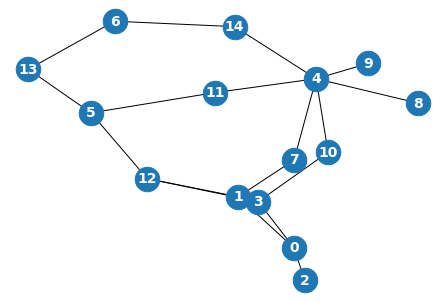

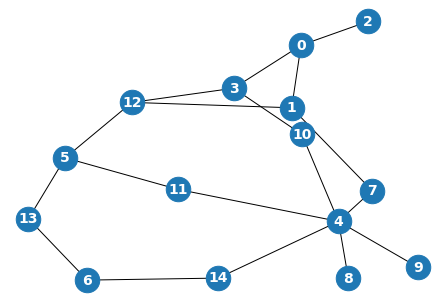

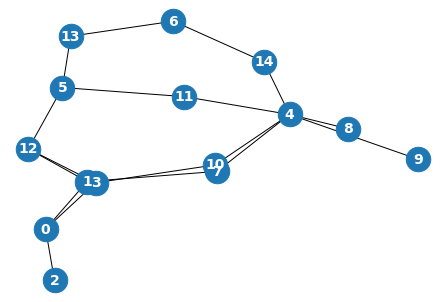

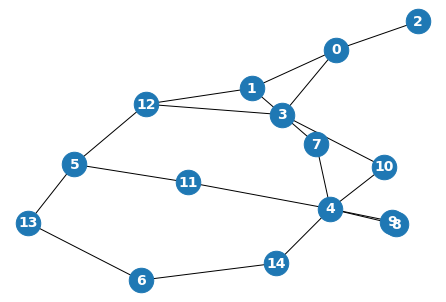

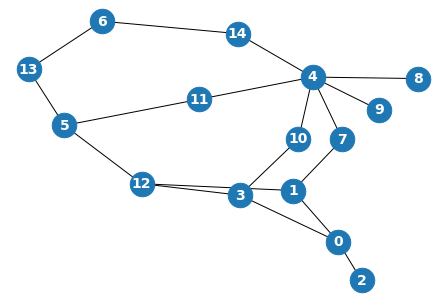

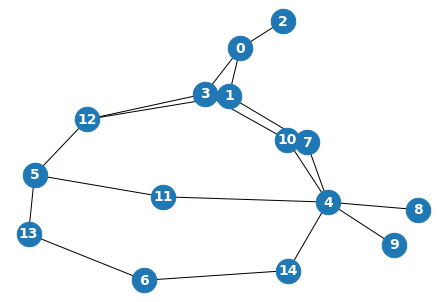

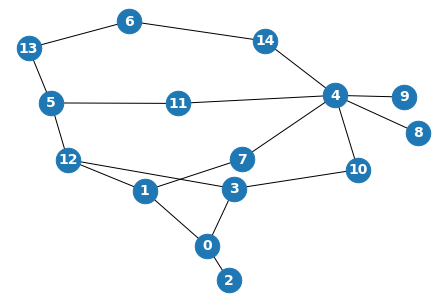

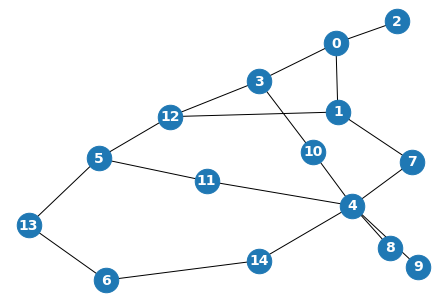

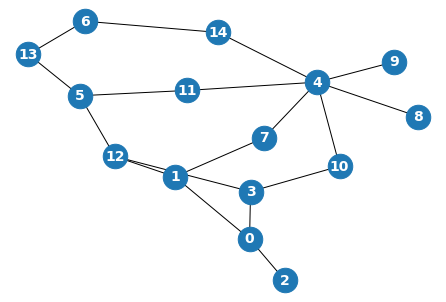

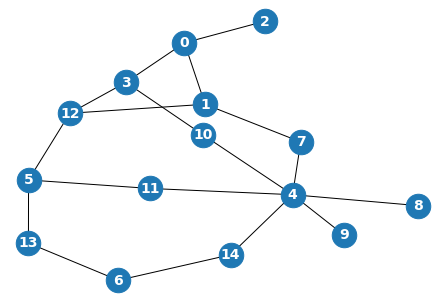

In [15]:
chain_visualize(10010, model, model_names, epochs)

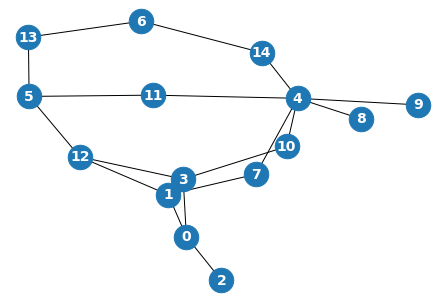

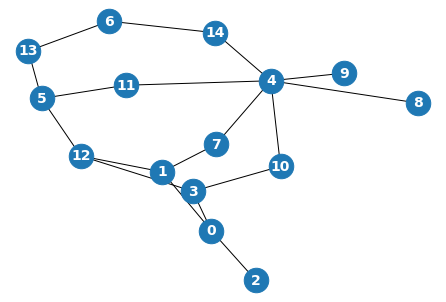

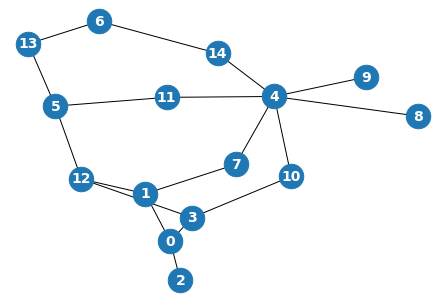

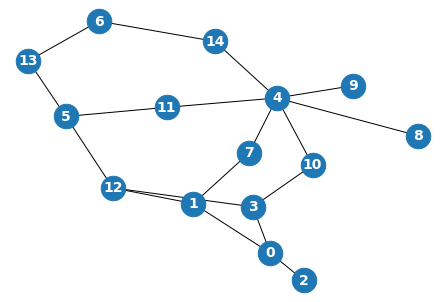

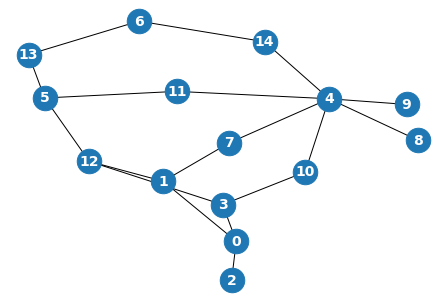

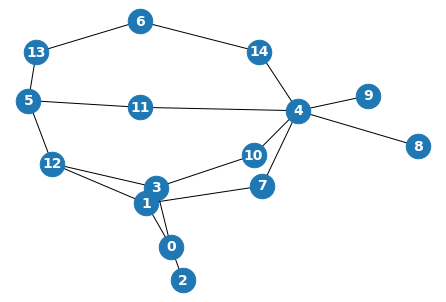

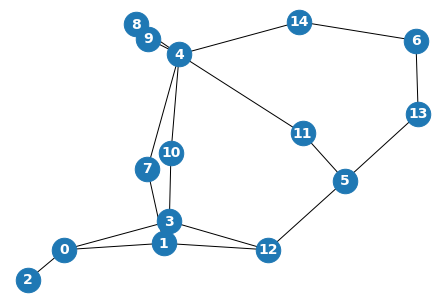

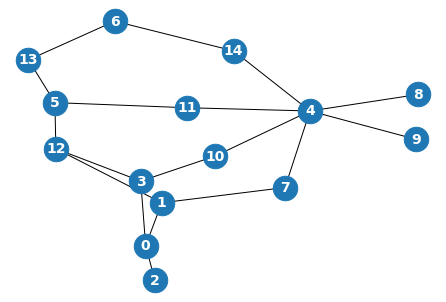

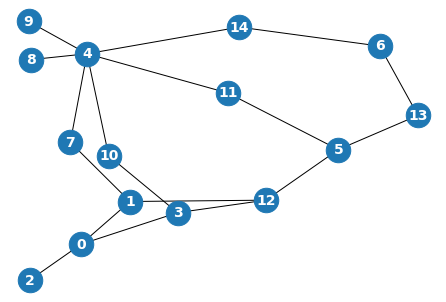

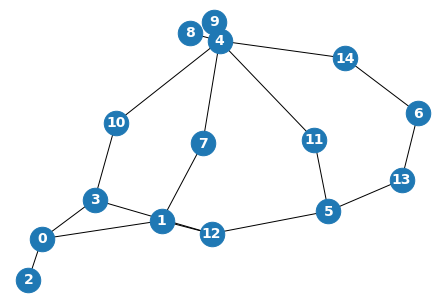

In [17]:
repeat_visualize(10010, model, model_names, epochs)

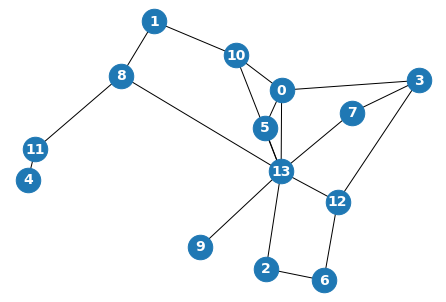

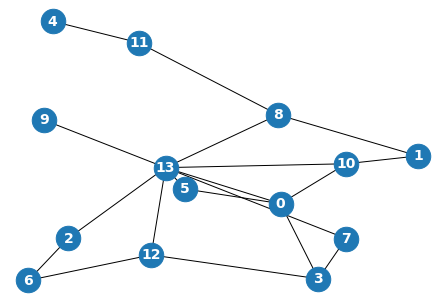

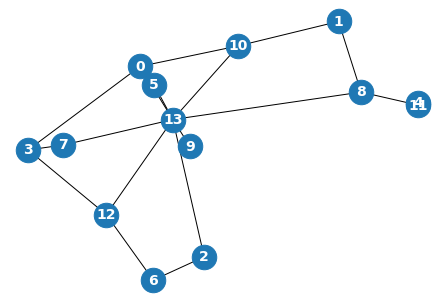

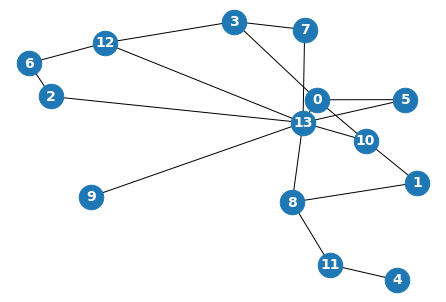

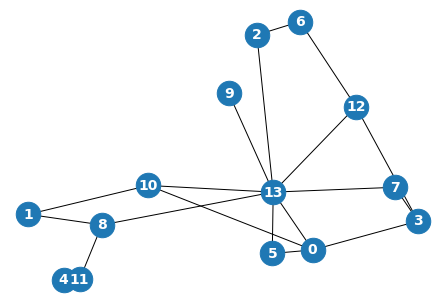

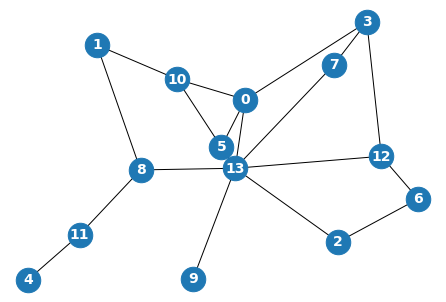

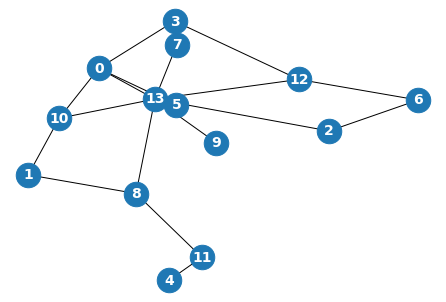

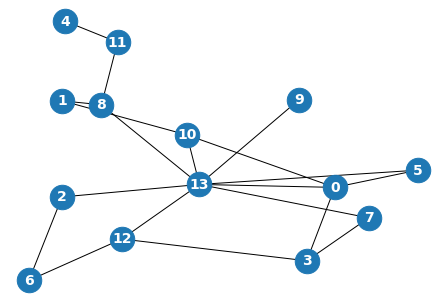

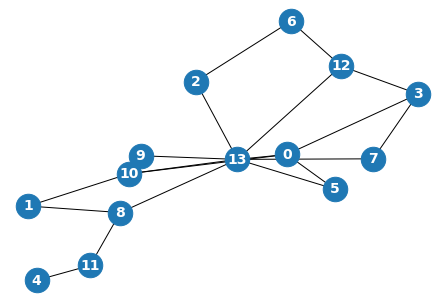

In [38]:
chain_visualize(10013, model, model_names, epochs)

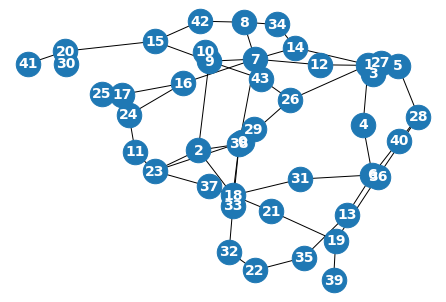

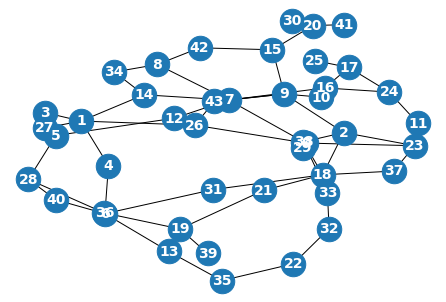

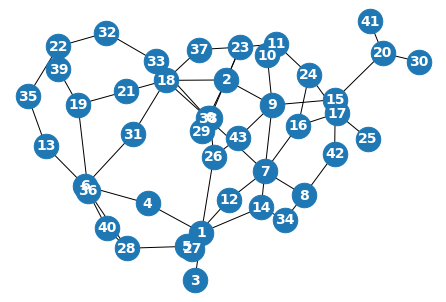

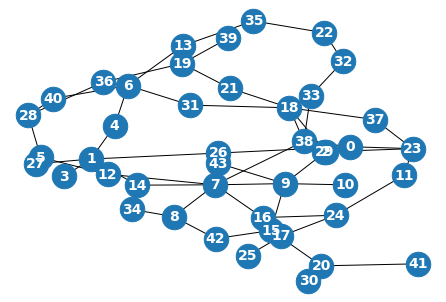

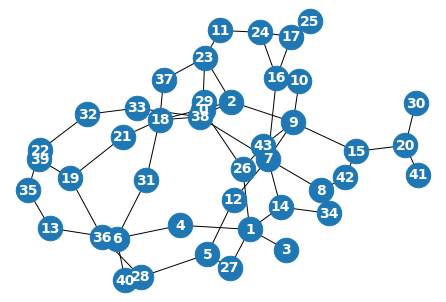

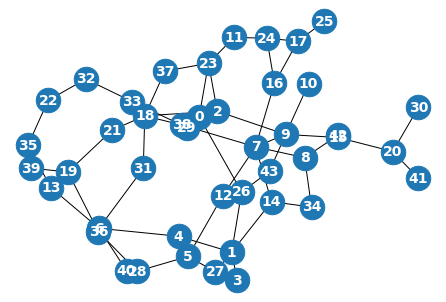

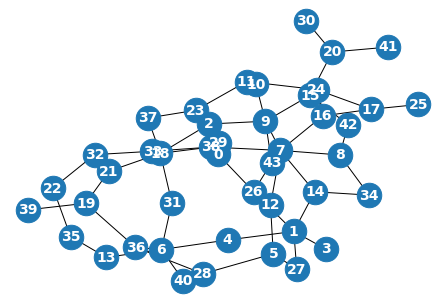

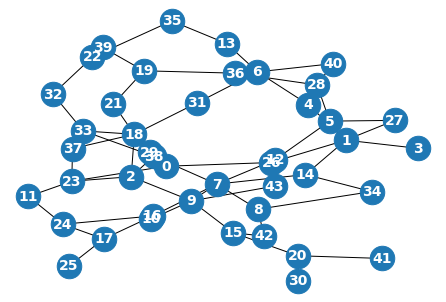

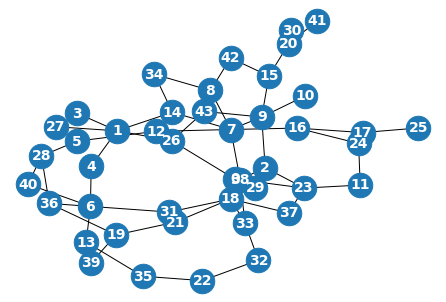

In [40]:
chain_visualize(10002, model, model_names, epochs)